# Análise e Tratamento de Dados de Inflação (IHPC) dos Países da União Europeia

**Fonte dos Dados:** [HICP - monthly data (index) - Eurostat Databrowser](https://ec.europa.eu/eurostat/databrowser/product/page/prc_hicp_midx)

- **Pacotes python**

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

- **Carregando os dados**

In [125]:
PATH_FILE = '.\..\data\Data_euro_IHPC.csv'
df = pd.read_csv(PATH_FILE)

- **Estrutura dos dados**

In [126]:
display(df.shape)
display(df.head(10))
display(df.dtypes)

(270, 3)

,Pais,Data,IHPC_Indice
0,Belgium,2025-01,133.07
1,Belgium,2025-02,136.32
2,Belgium,2025-03,135.71
3,Belgium,2025-04,134.79
4,Belgium,2025-05,134.67
5,Belgium,2025-06,135.32
6,Belgium,2025-07,134.17
7,Belgium,2025-08,136.19
8,Belgium,2025-09,135.76
9,Belgium,2025-10,136.26


Pais            object
Data            object
IHPC_Indice    float64
dtype: object

- **Adicionando a granularidade de Mês**

In [127]:
df['Mes'] = pd.to_datetime(df['Data']).dt.month
df['N.Mes'] = pd.to_datetime(df['Data']).dt.month_name()

- **Classificação dos países que adotam a política monetária do Banco Central Europeu (BCE) e não possuem política monetária nacional/própria.**

In [128]:
bank = {
    # --- Países da Zona do Euro (ECB) ---
    "Austria": "European Central Bank",
    "Belgium": "European Central Bank",
    "Croatia": "European Central Bank",
    "Cyprus": "European Central Bank",
    "Estonia": "European Central Bank",
    "Finland": "European Central Bank",
    "France": "European Central Bank",
    "Germany": "European Central Bank",
    "Greece": "European Central Bank",
    "Ireland": "European Central Bank",
    "Italy": "European Central Bank",
    "Latvia": "European Central Bank",
    "Lithuania": "European Central Bank",
    "Luxembourg": "European Central Bank",
    "Malta": "European Central Bank",
    "Netherlands": "European Central Bank",
    "Portugal": "European Central Bank",
    "Slovakia": "European Central Bank",
    "Slovenia": "European Central Bank",
    "Spain": "European Central Bank",

    # Banco central nacional
    "Bulgaria": "National Central Bank",
    "Czechia": "National Central Bank",
    "Denmark": "National Central Bank",
    "Hungary": "National Central Bank",
    "Poland": "National Central Bank",
    "Romania": "National Central Bank",
    "Sweden": "National Central Bank",
}

df['Banco Central'] = df['Pais'].map(bank)

- **Nova estrutura**

In [129]:
display(df.head())
display(df.isnull().sum())

,Pais,Data,IHPC_Indice,Mes,N.Mes,Banco Central
0,Belgium,2025-01,133.07,1,January,European Central Bank
1,Belgium,2025-02,136.32,2,February,European Central Bank
2,Belgium,2025-03,135.71,3,March,European Central Bank
3,Belgium,2025-04,134.79,4,April,European Central Bank
4,Belgium,2025-05,134.67,5,May,European Central Bank


Pais             0
Data             0
IHPC_Indice      0
Mes              0
N.Mes            0
Banco Central    0
dtype: int64

- **Exportando a tabela**

In [130]:
df.to_excel('.\..\data\europa_ihpc.xlsx', index=False)

### Análisando a média do IHPC por banco central ###

In [131]:
ihpc_bank = df.groupby('Banco Central')['IHPC_Indice'].mean()

- **Média do IHCP por banco central**

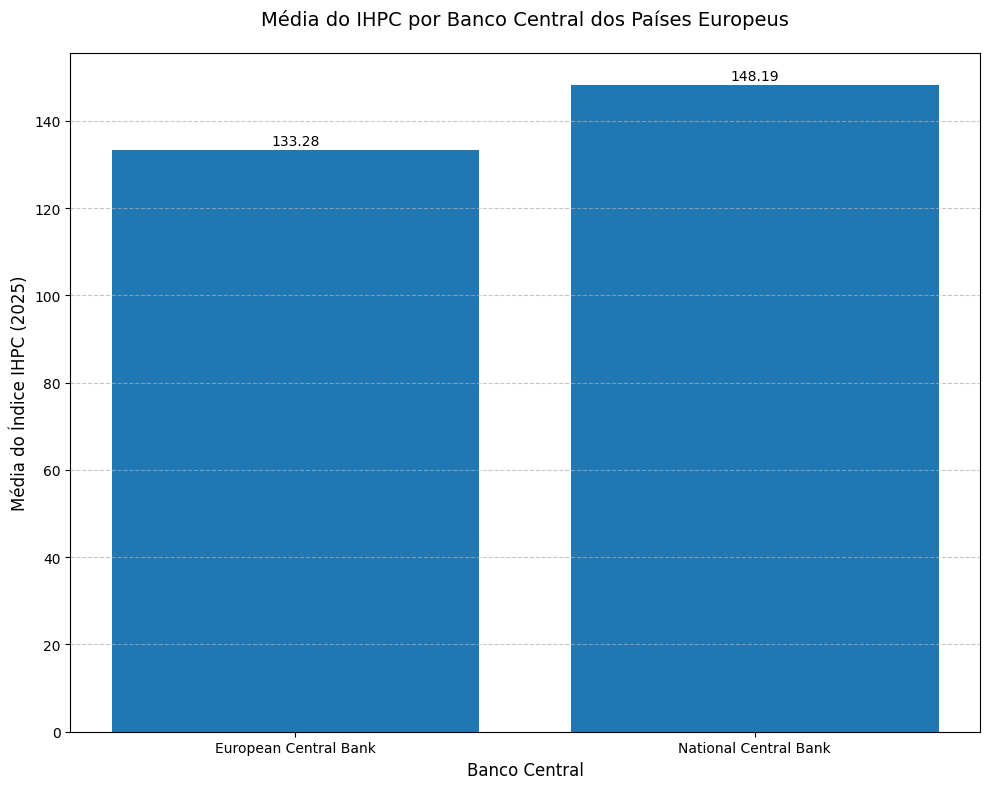

In [132]:


plt.figure(figsize=(10, 8))
bars = plt.bar(ihpc_bank.index, ihpc_bank.values, color='#1f77b4') # Cor padrão azul

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2.0, 
        yval + 0.5,                       
        f'{yval:.2f}',                    
        ha='center',                      
        va='bottom'                       
    )

plt.title('Média do IHPC por Banco Central dos Países Europeus', fontsize=14, pad=20)
plt.ylabel('Média do Índice IHPC (2025)', fontsize=12)
plt.xlabel('Banco Central', fontsize=12)
plt.xticks(rotation=0) # Mantém os rótulos do eixo X retos
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona linhas de grade no eixo Y
plt.tight_layout() # Ajusta o layout para evitar cortes
plt.show()

### Inflação dos países ###

- **Países com maior IHPC**

In [133]:
country_max = df[['Pais', 'IHPC_Indice']].nlargest(10, 'IHPC_Indice')
display(country_max)

,Pais,IHPC_Indice
167,Hungary,174.87
166,Hungary,174.80
169,Hungary,174.61
168,Hungary,174.55
165,Hungary,174.03
164,Hungary,173.72
163,Hungary,173.32
162,Hungary,173.12
161,Hungary,173.11
160,Hungary,171.85


- **Países com menor IHPC**

In [134]:
country_min = df[['Pais','IHPC_Indice']].nsmallest(10, 'IHPC_Indice')
display(country_min)

,Pais,IHPC_Indice
120,Cyprus,115.95
121,Cyprus,116.26
122,Cyprus,116.86
123,Cyprus,117.68
124,Cyprus,117.95
125,Cyprus,118.45
126,Cyprus,118.92
60,Ireland,119.20
128,Cyprus,119.39
129,Cyprus,119.45


### **Conclusão do ranking do IHPC** ###
A conclusão do ranking do Índice de Inflação do Consumidor (IHPC) aponta que o maior índice ao longo de todo o ano de 2025 foi o da Hungria — um país com política monetária própria. Por outro lado, o menor índice pertence principalmente ao Chipre e à Irlanda.

- **Exportando a tabela de variação do IHPC agrupada por país**

In [159]:
table_ihpc_pct = df.groupby('Pais')['IHPC_Indice'].pct_change()

result = pd.DataFrame({
    'Pais': df['Pais'],         # pega os nomes dos países corretos
    'IHPC_pct': table_ihpc_pct  # pega a variação pct na mesma ordem
})
result.to_excel('./../data/pct_ihpc.xlsx', index=False)